<a href="https://colab.research.google.com/github/0xfffddd/Coding/blob/main/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network: Handwritten Digit Recognition

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a CNN model to predict the class of digit.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


## The MNIST dataset

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it.

In [5]:
# the data, shuffled and split between train and test sets
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

### Reshape and normalize the features

In [6]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train_pre.reshape(X_train_pre.shape[0], img_rows, img_cols, 1)
X_test = X_test_pre.reshape(X_test_pre.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 28, 28, 1)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot coding

In [7]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)

## The model

### Build the model

In [10]:
model = keras.Sequential()
model.add(layers.Conv2D(filters = 10, kernel_size=(5, 5), # padding = "same",
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters = 20, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.RMSprop(0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)



### Train the model

In [12]:
EPOCHS = 20
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# use validation_split argument to do train-validation split
history = model.fit(X_train, y_train,
                    batch_size=BATCH, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.8454 - loss: 0.4729 - val_accuracy: 0.9770 - val_loss: 0.0737
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9793 - loss: 0.0693 - val_accuracy: 0.9824 - val_loss: 0.0607
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9835 - loss: 0.0569 - val_accuracy: 0.9789 - val_loss: 0.0849
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9858 - loss: 0.0477 - val_accuracy: 0.9848 - val_loss: 0.0532
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9888 - loss: 0.0435 - val_accuracy: 0.9804 - val_loss: 0.0922
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9894 - loss: 0.0395 - val_accuracy: 0.9837 - val_loss: 0.0944



### Visualize the Weights

In [14]:
model.layers

[<Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <MaxPooling2D name=max_pooling2d_5, built=True>,
 <Flatten name=flatten_2, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [15]:
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [16]:
n_filters, ix = 6, 1

In [17]:
filters.shape

(5, 5, 1, 10)

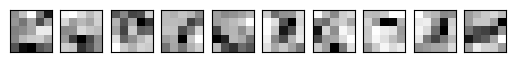

In [18]:
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 10, 1
for i in range(n_filters):
  # get the filter
  f = filters[:, :, :, i]
  # plot each channel separately
  for j in range(1):
  # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
  # plot filter channel in grayscale
    plt.imshow(f[:, :, j], cmap='gray')
    ix += 1
# show the figure
plt.show()

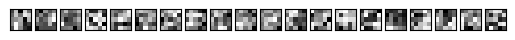

In [19]:
filters, biases = model.layers[2].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 20, 1
for i in range(n_filters):
  # get the filter
  f = filters[:, :, :, i]
  # plot each channel separately
  for j in range(1):
  # specify subplot and turn of axis
    ax = plt.subplot(1, n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
  # plot filter channel in grayscale
    plt.imshow(f[:, :, j], cmap='gray')
    ix += 1
# show the figure
plt.show()

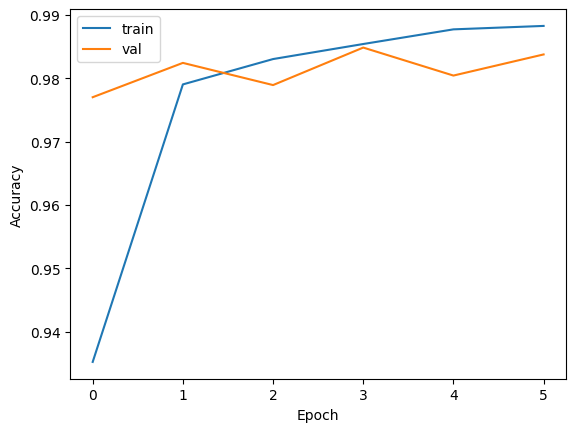

In [21]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [22]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.48%


Make predictions for testing data

In [23]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([7, 2, 1, 0, 4])

Visualize predictions

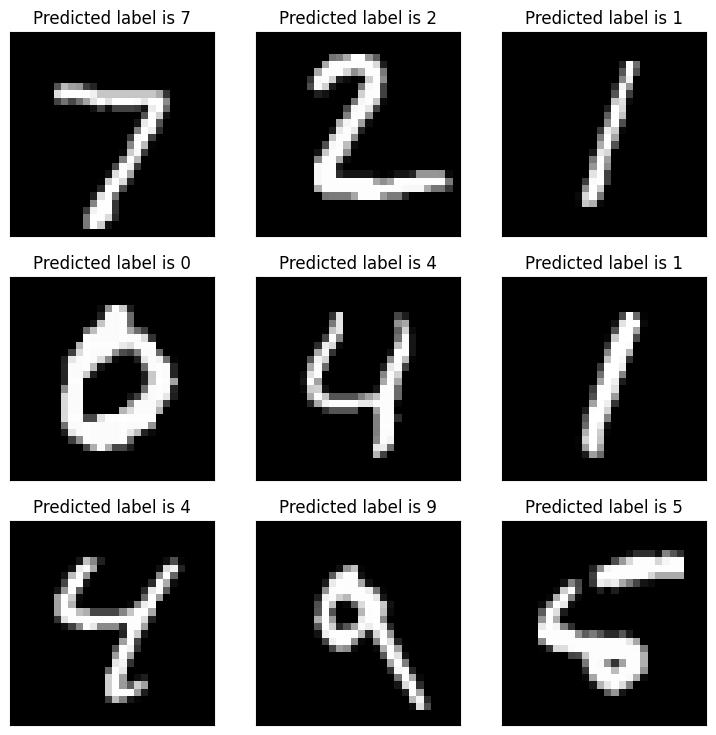

In [24]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(col*row):
    pred = y_pred[i]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## With Dropout

In [25]:
model = keras.Sequential()
model.add(layers.Conv2D(filters = 10, kernel_size=(5, 5), # padding = "same",
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(20, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.RMSprop(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
EPOCHS = 20
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# use validation_split argument to do train-validation split
history = model.fit(X_train, y_train,
                    batch_size=BATCH, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6755 - loss: 0.9715 - val_accuracy: 0.9556 - val_loss: 0.1442
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9293 - loss: 0.2293 - val_accuracy: 0.9744 - val_loss: 0.0838
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9527 - loss: 0.1580 - val_accuracy: 0.9783 - val_loss: 0.0714
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9591 - loss: 0.1346 - val_accuracy: 0.9804 - val_loss: 0.0632
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9679 - loss: 0.1112 - val_accuracy: 0.9839 - val_loss: 0.0534
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9693 - loss: 0.1024 - val_accuracy: 0.9862 - val_loss: 0.0494
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9713 - loss: 0.0909 - val_accuracy: 0.9865 - val_loss: 0.0471
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9766 - loss: 0.0767 - 

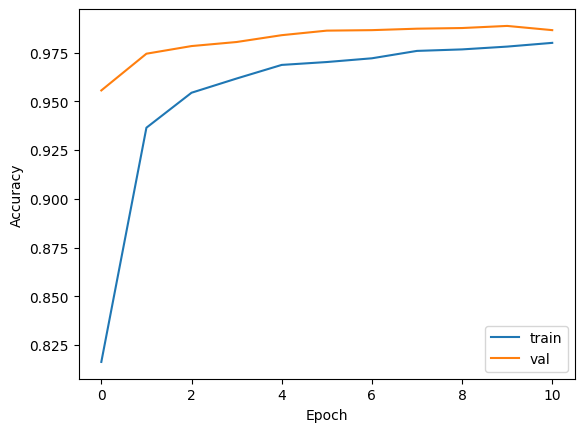

In [28]:
plot_history(history)

In [29]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.92%
